# Visium HD data

In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import os
path = '../STHD/analysis/exp1_full_patchify/patches/'
path = '../STHD/analysis/colon_full_patchify/patches/'

In [24]:
import torch
import random
import pandas as pd
import numpy as np
from STHD import train, sthdviz

class PatchDataset(torch.utils.data.Dataset):
    def __init__(self, path, train=True, transform=None):
        self.patches = [path + f for f in os.listdir(path)]
        
        n = int(len(self.patches) * 0.8)
        self.patches = self.patches[:n] if train else self.patches[n:]
        
        self.transform = transform

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, idx):
        patch = random.choice(self.patches)
        data = train.load_data(patch)
        import pandas as pd

        data.adata.obs['n_counts'] = data.adata.X.sum(axis=1)
        df = data.adata.obs[['array_row', 'array_col', 'in_tissue', 'n_counts']]
        epcam = data.adata.to_df()['EPCAM']
        df = pd.concat([df, epcam], axis=1)

        df_rasterize = sthdviz.rasterize_numerical(df, 'EPCAM')
        df_in_tissue = sthdviz.rasterize_numerical(df, 'in_tissue')
        df_n_counts = sthdviz.rasterize_numerical(df, 'n_counts')
        
        block = np.stack([df_in_tissue, df_n_counts, df_rasterize], axis=0)
        block = torch.from_numpy(block)
        return self.transform(block)

import torch.nn.functional as F
class Pad:
    def __init__(self, crop_size, padding_mode='constant'):
        self.crop_size = crop_size
        self.padding_mode = padding_mode

    def __call__(self, img):
        _, width, height = img.shape
        pad_w = max(0, self.crop_size[0] - width)
        pad_h = max(0, self.crop_size[1] - height)

        if pad_w > 0 or pad_h > 0:
            padding = (pad_h//2, pad_h-pad_h//2, pad_w//2, pad_w-pad_w//2)
            img = F.pad(img, padding, mode=self.padding_mode, value=0)
    
        return img

/hpc/group/yizhanglab/yz812/miniconda3/envs/pytorch/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/hpc/group/yizhanglab/yz812/miniconda3/envs/pytorch/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [25]:
from torchvision import transforms

size = (256, 256)
transform = transforms.Compose([Pad(size),
                                transforms.RandomCrop(size),
                                transforms.RandomHorizontalFlip(),
                                transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0))])

train_dataset = PatchDataset(path, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

for i, batch in enumerate(train_loader):
    data = batch
    break

/hpc/group/yizhanglab/yz812/miniconda3/envs/pytorch/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[log] Number of spots:  29384
429.0 602.0 174
335.0 508.0 174


100%|██████████| 29384/29384 [00:00<00:00, 2237896.37it/s]


429.0 602.0 174
335.0 508.0 174


100%|██████████| 29384/29384 [00:00<00:00, 2236880.93it/s]


429.0 602.0 174
335.0 508.0 174


100%|██████████| 29384/29384 [00:00<00:00, 2627778.27it/s]
/hpc/group/yizhanglab/yz812/miniconda3/envs/pytorch/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[log] Number of spots:  28750
253.0 426.0 174
0.0 168.0 169


100%|██████████| 28750/28750 [00:00<00:00, 1425352.42it/s]


253.0 426.0 174
0.0 168.0 169


100%|██████████| 28750/28750 [00:00<00:00, 1220718.54it/s]


253.0 426.0 174
0.0 168.0 169


100%|██████████| 28750/28750 [00:00<00:00, 1422393.34it/s]
/hpc/group/yizhanglab/yz812/miniconda3/envs/pytorch/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[log] Number of spots:  29509
257.0 430.0 174
337.0 510.0 174


100%|██████████| 29509/29509 [00:00<00:00, 1415400.73it/s]


257.0 430.0 174
337.0 510.0 174


100%|██████████| 29509/29509 [00:00<00:00, 1217223.47it/s]


257.0 430.0 174
337.0 510.0 174


100%|██████████| 29509/29509 [00:00<00:00, 1412751.16it/s]
/hpc/group/yizhanglab/yz812/miniconda3/envs/pytorch/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[log] Number of spots:  29500
84.0 257.0 174
168.0 341.0 174


100%|██████████| 29500/29500 [00:00<00:00, 1444943.63it/s]


84.0 257.0 174
168.0 341.0 174


100%|██████████| 29500/29500 [00:00<00:00, 1249098.68it/s]


84.0 257.0 174
168.0 341.0 174


100%|██████████| 29500/29500 [00:00<00:00, 1448478.94it/s]


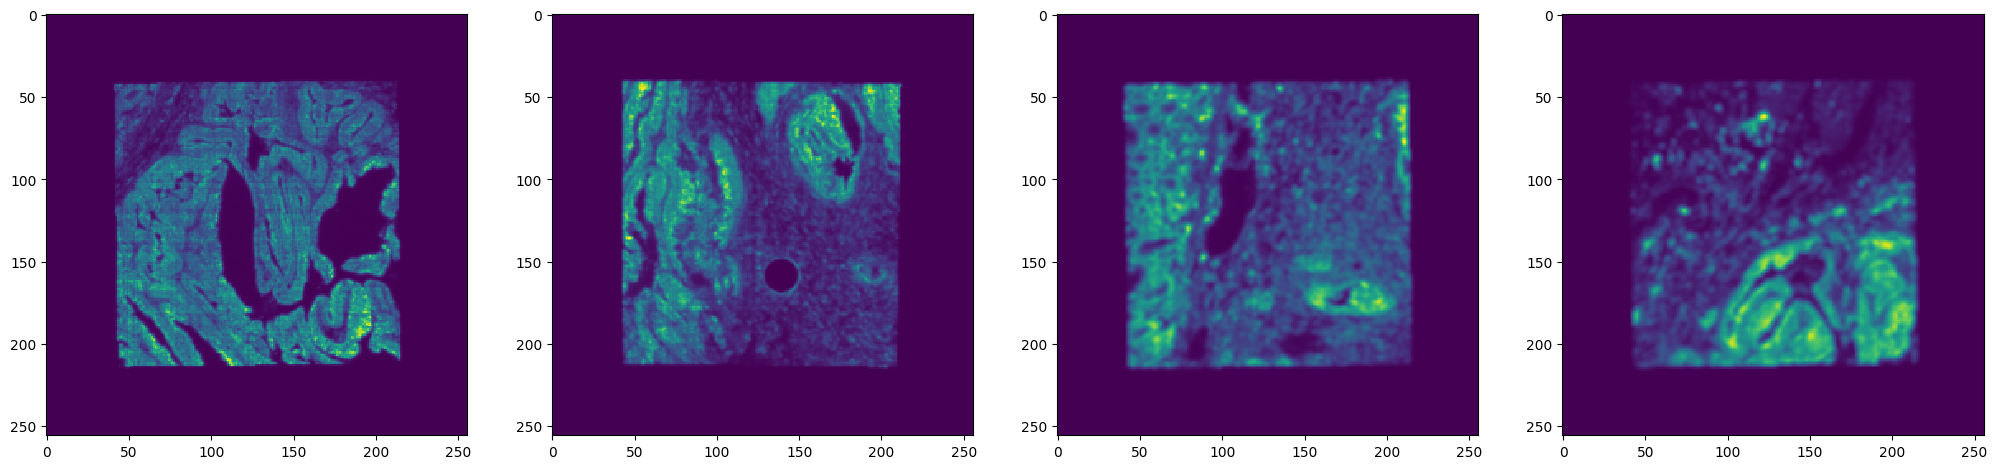

In [26]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots(nrows=1, ncols=4, figsize=(25, 25))
for i in range(4):
    axe[i].imshow(data[i, 2].cpu(), interpolation='nearest')

In [27]:
from model.unet_lite import Unet
from config.default_configs import get_default_configs

config = get_default_configs()
model = Unet(config).to(config.device)
pred = model(data[:,2:3,:,:].to(config.device), torch.ones(4).to(config.device))

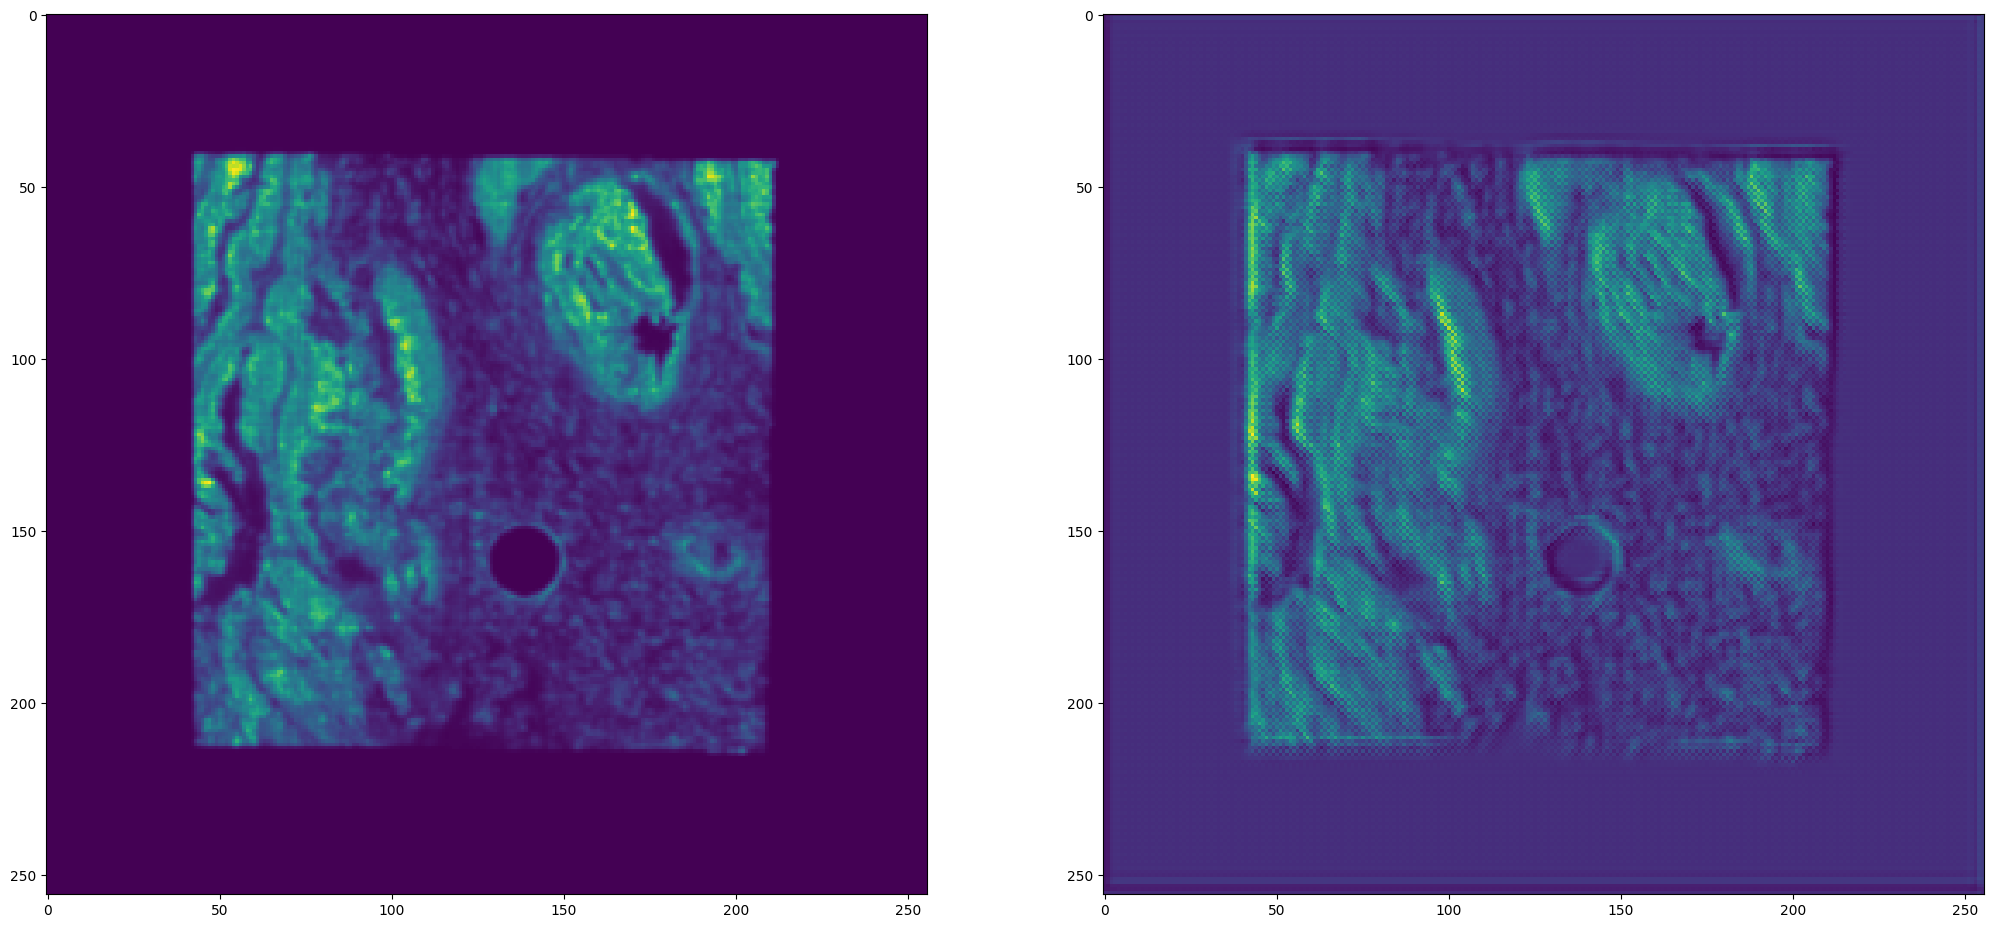

In [28]:
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
axe[0].imshow(data[1, 2].cpu(), interpolation='nearest')
axe[1].imshow(pred[1, 0].cpu().detach(), interpolation='nearest')

# MNIST bounday

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from config.default_configs import get_default_configs
config = get_default_configs()

from torchvision import transforms, datasets
import torch

In [56]:
class Poisson:
    def __init__(self, ratio):
        self.ratio = ratio

    def __call__(self, img):
        counts = torch.poisson(img * self.ratio)
        bounds = img
        return torch.cat([img, counts, counts], dim=0)

transform = transforms.Compose([transforms.Resize(config.data.image_size),
                                transforms.ToTensor(),
                                Poisson(0.3),
                                transforms.RandomHorizontalFlip(),
                                transforms.GaussianBlur(kernel_size=5, sigma=(0.8, 0.8))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

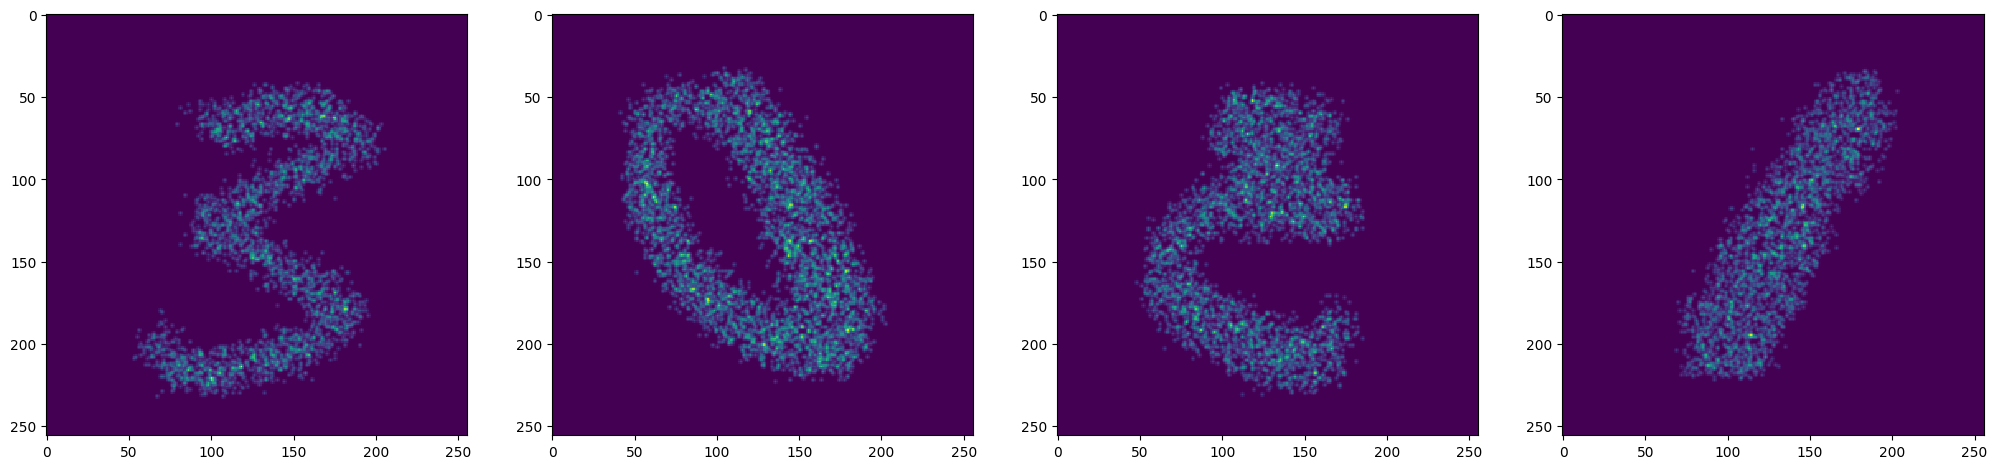

In [59]:
for i, batch in enumerate(train_loader):
    data, label = batch
    break

import matplotlib.pyplot as plt
fig, axe = plt.subplots(nrows=1, ncols=4, figsize=(25, 25))
for i in range(4):
    axe[i].imshow(data[i, 0].cpu(), interpolation='nearest')